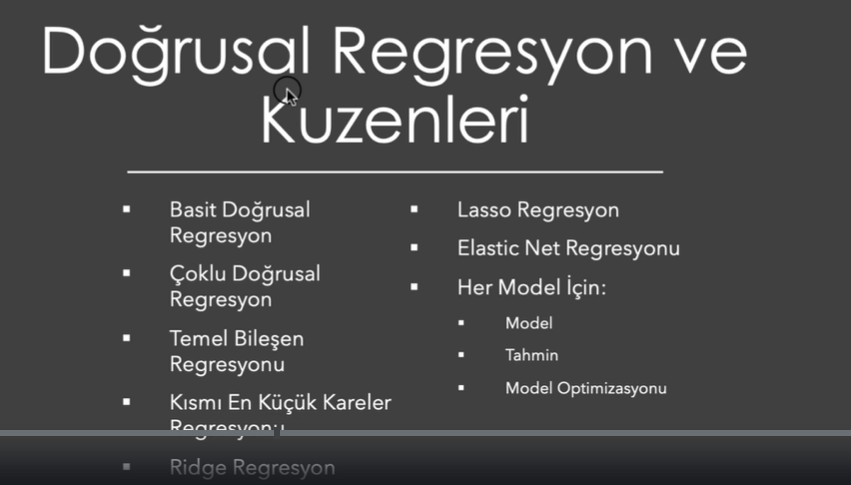

# Basit Doğrusal Regresyon

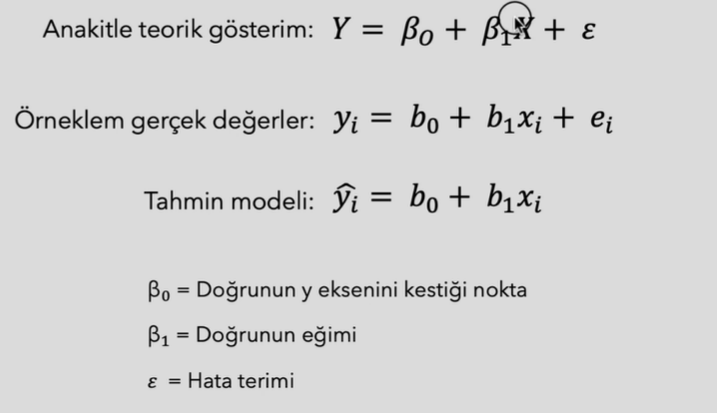

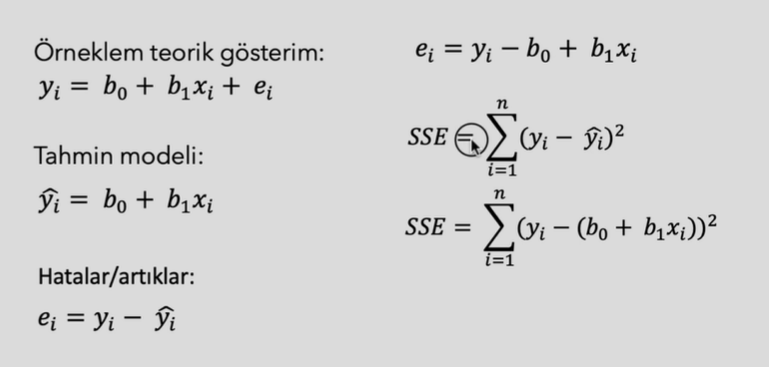

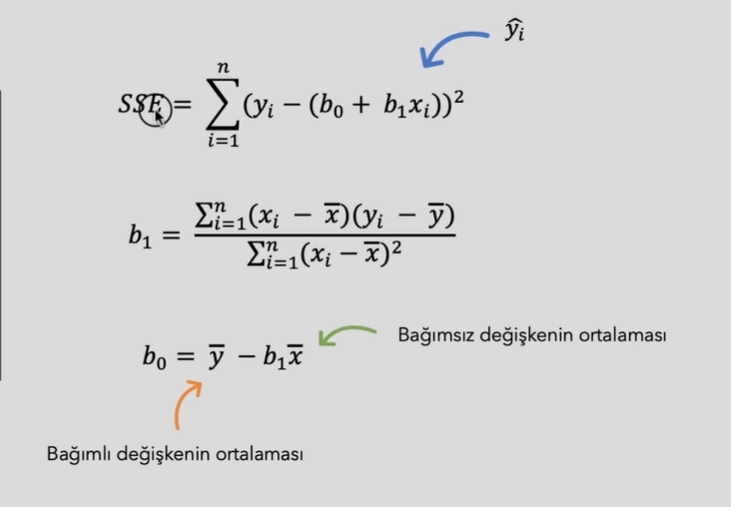

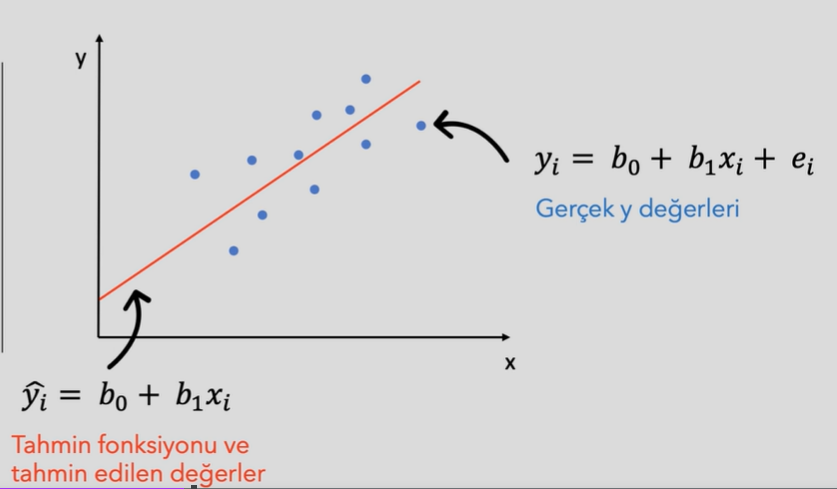

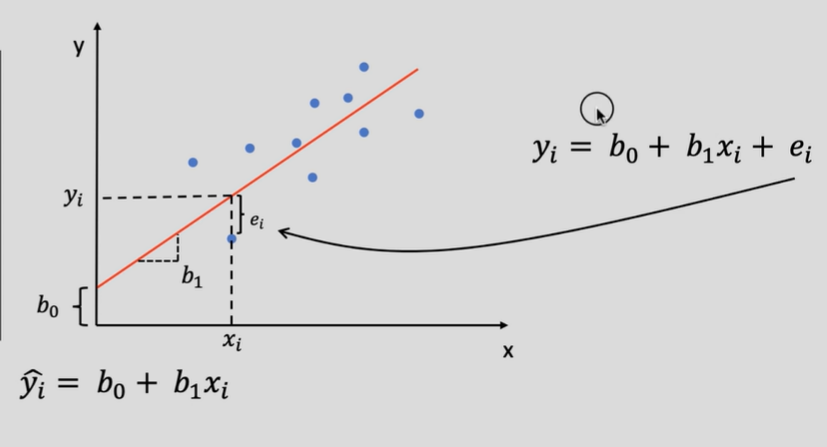

## Modelleme 

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Advertising.csv'

In [ ]:
#df = df.iloc[:,1:len(df)]

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.isnull().values.any()

In [ ]:
df.corr()

In [ ]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

In [ ]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

## Statsmodels ile modelleme

In [ ]:
import statsmodels.api as sm

In [ ]:
X = df[["TV"]]
X[0:5]

In [ ]:
X = sm.add_constant(X)

In [ ]:
X[0:5]

In [ ]:
y = df["sales"]

In [ ]:
y[0:5]

In [ ]:
lm = sm.OLS(y,X)

In [ ]:
model = lm.fit()

In [ ]:
model.summary()

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

In [ ]:
model.params

In [ ]:
model.summary().tables[1]

In [ ]:
model.conf_int()

In [ ]:
model.f_pvalue

In [ ]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

In [ ]:
print("fvalue: ", "%.2f" % model.fvalue)

In [ ]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

In [ ]:
model.rsquared_adj

In [ ]:
model.fittedvalues[0:5]

In [ ]:
y[0:5]

In [ ]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

In [ ]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

In [ ]:
model.score(X,y)

In [ ]:
model.predict(X)[0:10]

## Tahmin

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [ ]:
7.03 + 30*0.04

In [ ]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [ ]:
model.predict([[30]])

In [ ]:
yeni_veri = [[5],[90],[200]]

In [ ]:
model.predict(yeni_veri)

## Artıklar ve Makine Öğrenmesindeki Önemi

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [ ]:
mse = mean_squared_error(y, model.fittedvalues)

In [ ]:
mse

In [ ]:
import numpy as np
rmse = np.sqrt(mse)

In [ ]:
rmse

In [ ]:
reg.predict(X)[0:10]

In [ ]:
y[0:10]

In [ ]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [ ]:
k_t

In [ ]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [ ]:
k_t

In [ ]:
k_t["hata_kare"] = k_t["hata"]**2

In [ ]:
k_t

In [ ]:
np.sum(k_t["hata_kare"])

In [ ]:
np.mean(k_t["hata_kare"])

In [ ]:
np.sqrt(np.mean(k_t["hata_kare"]))

In [ ]:
model.resid[0:10]

In [ ]:
plt.plot(model.resid)

# Çoklu Doğrusal Regresyon¶


In [ ]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [ ]:
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
training = df.copy()

In [ ]:
training.shape

## Statsmodels

In [ ]:
lm = sm.OLS(y_train, X_train)

In [ ]:
model = lm.fit()
model.summary()

In [ ]:
model.summary().tables[1]

## scikit-learn model

In [ ]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
model.intercept_

In [ ]:
model.coef_

## Tahmin

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?



In [ ]:
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [ ]:
model.predict(yeni_veri)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [ ]:
rmse

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [ ]:
rmse

## Model Tuning / Model Doğrulama

In [ ]:
df.head()

In [ ]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [ ]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [ ]:
model.score(X_train, y_train)

In [ ]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

In [ ]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

In [ ]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

# PCR Model

In [ ]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

In [ ]:
y = df["Salary"]

In [ ]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [ ]:
X_.head()

In [ ]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [ ]:
X_reduced_train[0:1,:]

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

In [ ]:
lm = LinearRegression()

In [ ]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [ ]:
pcr_model.intercept_

In [ ]:
pcr_model.coef_

## Tahmin

In [ ]:
y_pred = pcr_model.predict(X_reduced_train)

In [ ]:
y_pred[0:5]

In [ ]:
np.sqrt(mean_squared_error(y_train, y_pred))

In [ ]:
df["Salary"].mean()

In [ ]:
r2_score(y_train, y_pred)

In [ ]:
pca2 = PCA()

In [ ]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [ ]:
y_pred = pcr_model.predict(X_reduced_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn import model_selection

In [ ]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [ ]:
lm = LinearRegression()

In [ ]:
RMSE = []

In [ ]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [ ]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [ ]:
lm = LinearRegression()

In [ ]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [ ]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [ ]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

In [ ]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

# PLS

## Model

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [ ]:
pls_model = PLSRegression().fit(X_train, y_train)

In [ ]:
pls_model.coef_

## Tahmin

In [ ]:
X_train.head()

In [ ]:
pls_model.predict(X_train)[0:10]

In [ ]:
y_pred = pls_model.predict(X_train)

In [ ]:
np.sqrt(mean_squared_error(y_train, y_pred))

In [ ]:
r2_score(y_train, y_pred)

In [ ]:
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [ ]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [ ]:
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# Ridge Regresyon

## Model

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [ ]:
ridge_model

In [ ]:
ridge_model.coef_

In [ ]:
10**np.linspace(10,-2,100)*0.5 

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

## Tahmin

In [ ]:
y_pred = ridge_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [ ]:
lambdalar[0:5]

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [ ]:
ridge_cv.fit(X_train, y_train)

In [ ]:
ridge_cv.alpha_

In [ ]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

# Lasso Regresyon

## Model

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [ ]:
lasso_model

In [ ]:
lasso_model.coef_

In [ ]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Tahmin 

In [ ]:
lasso_model.predict(X_test)

In [ ]:
y_pred = lasso_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [ ]:
lasso_cv_model.fit(X_train,y_train)

In [ ]:
lasso_cv_model.alpha_

In [ ]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [ ]:
lasso_tuned.fit(X_train, y_train)

In [ ]:
y_pred = lasso_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# ElasticNet Regresyonu

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)




In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
enet_model = ElasticNet().fit(X_train, y_train)

In [ ]:
enet_model.coef_

In [ ]:
enet_model.intercept_

## Tahmin

In [ ]:
enet_model

In [ ]:
enet_model.predict(X_test)

In [ ]:
y_pred = enet_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
r2_score(y_test, y_pred)

## Model Tuning

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [ ]:
enet_cv_model.alpha_

In [ ]:
enet_cv_model

In [ ]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [ ]:
y_pred = enet_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))